# Multiple schemas
* A LangGraph app can have more than one state schema.

## Setup

#### After you download the code from the github repository in your computer
In terminal:
* cd project_name
* pyenv local 3.11.4
* poetry install
* poetry shell

#### To open the notebook with Jupyter Notebooks
In terminal:
* jupyter lab

Go to the folder of notebooks and open the right notebook.

# To see the code in Virtual Studio Code or your editor of choice.
* open Virtual Studio Code or your editor of choice.
* open the project-folder
* open the 011-primary-and-secondary-schemas.py file

## Create your .env file
* In the github repo we have included a file named .env.example
* Rename that file to .env file and here is where you will add your confidential api keys. Remember to include:
* OPENAI_API_KEY=your_openai_api_key
* LANGCHAIN_TRACING_V2=true
* LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
* LANGCHAIN_API_KEY=your_langchain_api_key
* LANGCHAIN_PROJECT=your_project_name

## Track operations
From now on, we can track the operations **and the cost** of this project from LangSmith:
* [smith.langchain.com](https://smith.langchain.com)

## Connect with the .env file located in the same directory of this notebook

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [1]:
#pip install python-dotenv

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]
os.environ["http_proxy"] = ""
os.environ["https_proxy"] = ""

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

In [2]:
from langchain_openai import ChatOpenAI

chatModel35 = ChatOpenAI(model="gpt-3.5-turbo-0125")
chatModel4o = ChatOpenAI(model="gpt-4o")

## Let's explain this concept with a real-world example: private and public schemas.
* A man takes his broken computer to a repair store.  
* A store employee receives the computer, gathers the man’s feedback, and passes the information to the technicians.  
* The technicians discuss how to repair the computer:  
    * Their conversation is highly technical and not meant for the customer to understand.  
    * **This discussion remains private and does not involve the customer. This is like the private schema in our app: it is only shared among some nodes, but not with the user.**  
* Once the repair is completed:  
    * The technicians explain the issue in simple terms to the store employee.  
    * The store employee returns the repaired computer to the man and explains the problem in simple terms.  
        * **This explanation serves as the public communication with the customer. This is like the public schema in our app: it the final version shared with the user.**

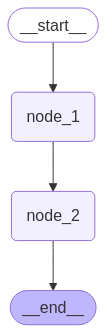

In [3]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# In our example, this would be the public communication with the customer.
class PublicState(TypedDict):
    simpleExplanation: int

# In our example, this would be the private discussion among the technicians.
class PrivateState(TypedDict):
    technicalExplanation: int

# the node_1 is like the technicians in our example: they get the initial simple explanation from 
# the customer and have their own technical conversation.
# node_1 gets the info from the PublicState (the simpleExplanation) and uses it to 
# create the PrivateState (the technicalExplanation, 1000 times more complex).
def node_1(state: PublicState) -> PrivateState:
    print("---Node 1---")
    return {"technicalExplanation": state['simpleExplanation'] + 1000}

# the node_2 is like the store employee in our example: she gets the feedback from 
# the technicians and delivers the new simple explanation to the customer.
# node_2 gets the info from the PrivateState (the technicalExplanation) and uses it to 
# create the PublicState (the simpleExplanation, 999 times less complex).
def node_2(state: PrivateState) -> PublicState:
    print("---Node 2---")
    return {"simpleExplanation": state['technicalExplanation'] - 999}

# Build graph
builder = StateGraph(PublicState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
graph.invoke({"simpleExplanation" : 1})

---Node 1---
---Node 2---


{'simpleExplanation': 2}

## How to execute the code from Visual Studio Code
* In Visual Studio Code, see the file 011-primary-and-secondary-schemas.py
* In terminal, make sure you are in the directory of the file and run:
    * python 011-primary-and-secondary-schemas.py